<a href="https://colab.research.google.com/github/vladgap/LLC/blob/main/YPH_LLC_simulation_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [72]:
pip install MLNN

In [73]:
from MLNN import*

# EQUIL data

In [74]:
class Kvalues_4: # P2O5 and sulfate
    def __init__(self, x):
        x=np.array(x)
        ## P2O5
        # y=A*x^B
        A, B = 1E-9, 5.9511
        # K=x/y=(1/A)*x^(1-B)
        K_P2O5 = (1/A)*x[0]**(1-B)

        ## SO4
        # y=a+b*x
        a, b = 0.06, 0.2 # מהראש
        y_SO4 = a + b*x[1]
        K_SO4 = x[1]/y_SO4
        self.K = [K_P2O5, K_SO4]

In [75]:
class Kvalues_2: # P2O5 only
    def __init__(self, x):
        x=np.array(x)
        ## P2O5
        # y=A*x^B
        A, B = 2.3445E-15, 9.4249
        # K=x/y=(1/A)*x^(1-B)
        K_P2O5 = (1/A)*x[0]**(1-B)

        self.K = [K_P2O5,]

In [76]:
class EQUIL_yph_1: # H3PO4 only, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)
        A, B = 1.14E-9, 5.95 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

In [77]:
#  נתונים מקובץ של שמעון עם 2 עקומות עם סולפט נמוך וגבוה
class EQUIL_yph_2_1: # H3PO4 only, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)
        A, B = 7E-10, 6.3295 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

class EQUIL_yph_2_2: # H3PO4 only, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)
        A, B = 7E-13, 8.2121 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

In [78]:
class EQUIL_yph_3: # H3PO4 and SO4, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq, %SO4_aq]
# calc xout , yout [%water_org, %H3PO4_org, %SO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4, %SO4_aq], [%solv, %H3PO4, %SO4_aq], [%solv, %H3PO4, %SO4_aq], ...]
        y=np.zeros_like(x)

        A, B = 1.14E-9, 5.95 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        a, b = 0.06, 0.2 # מהראש
        y[:,2] = a+b*x[:,2] # %SO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq, %SO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org, %SO4_org], ...]

In [79]:
class EQUIL_YPH_pur_28th: #
# gets xout [%solvent_aq, %H3PO4_aq, %Fe_aq]
# calc xout , yout [%water_org, %H3PO4_org, %Fe_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        # the model predicts Fe_org.
        # Solvent in aq and water in org are 0.
        # x[:,[1]] is column vector of %H3PO4_aq [[1], [2], ...]

        A, B = 1.14E-9, 5.95 #P2O5
        # A, B = 1, -36 #P2O5
        if np.any(x[:,1]<0):
          x[:,1]=x[:,1]*0
        H3PO4_org = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org
        # H3PO4_org = (A*(x[:,1]/98*71)+B)/71*98 # %H3PO4_org

        scaler_X = preprocessing.StandardScaler().fit([[0]])
        scaler_T = preprocessing.StandardScaler().fit([[0]])
        Xscale=[0.005795], [0.00218897]
        Tscale=[67.6], [24.73095227]
        scaler_X.mean_, scaler_X.scale_ = Xscale[0], Xscale[1]
        scaler_T.mean_, scaler_T.scale_ = Tscale[0], Tscale[1]

        # Fe_org
        bp_1=VectorBackProp(layers=[1,2,1], hidden_activation = 'prelu')
        manual_weights_1=[[[-0.40154548631450876, 1.0158534981949772]],
 [[-0.11055539480943363, 0.41943108875004126]],
 [[-0.3901591480587056], [1.0810541412468264]],
 [[0.22480836676521976]]]
        bp_1.import_weights(manual_weights_1)
        predics_1=scaler_T.inverse_transform(bp_1.run(scaler_X.transform(x[:,[2]])))
        Fe_org=x[:,2]/predics_1

        # water_org
        water_org=np.ones([len(x),1])*0

        # solvent_aq
        solvent_aq=np.ones([len(x),1])*0

        self.xout = np.array([solvent_aq, x[:,1], x[:,2]],dtype=object).T # [[%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        self.yout = np.array([water_org, H3PO4_org, Fe_org[:,0]],dtype=object).T # [[%water_org, %H3PO4_org, %Fe_org], ...]

        # print (self.yout, self.xout)

In [80]:
class EQUIL_YPH_pur_7th: #
# gets xout [%solvent_aq, %H3PO4_aq, %Fe_aq]
# calc xout , yout [%water_org, %H3PO4_org, %Fe_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        # the model predicts Fe_org.
        # Solvent in aq and water in org are 0.
        # x[:,[1]] is column vector of %H3PO4_aq [[1], [2], ...]

        A, B = 1.14E-9, 5.95 #P2O5
        if np.any(x[:,1]<0):
          x[:,1]=x[:,1]*0
        H3PO4_org = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        scaler_X = preprocessing.StandardScaler().fit([[0]])
        scaler_T = preprocessing.StandardScaler().fit([[0]])
        Xscale=[0.005795], [0.00218897]
        Tscale=[67.6], [24.73095227]
        scaler_X.mean_, scaler_X.scale_ = Xscale[0], Xscale[1]
        scaler_T.mean_, scaler_T.scale_ = Tscale[0], Tscale[1]

        # Fe_org
        bp_1=VectorBackProp(layers=[1,1,1], hidden_activation = 'prelu')
        manual_weights_1=[[[0.6358015459841858]],
 [[0.11489729435026273]],
 [[0.6396594654110533]],
 [[-0.9773384906278092]]]
        bp_1.import_weights(manual_weights_1)
        predics_1=scaler_T.inverse_transform(bp_1.run(scaler_X.transform(x[:,[2]])))
        Fe_org=x[:,2]/predics_1

        # water_org
        water_org=np.ones([len(x),1])*0

        # solvent_aq
        solvent_aq=np.ones([len(x),1])*0

        self.xout = np.array([solvent_aq, x[:,1], x[:,2]],dtype=object).T # [[%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        self.yout = np.array([water_org, H3PO4_org, Fe_org[:,0]],dtype=object).T # [[%water_org, %H3PO4_org, %Fe_org], ...]

        # print (self.yout, self.xout)

In [81]:
class EQUIL_YPH_pur_data_101223: #
# gets xout [%solvent_aq, %H3PO4_aq, %Fe_aq]
# calc xout , yout [%water_org, %H3PO4_org, %Fe_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        # the model predicts Fe_org.
        # Solvent in aq and water in org are 0.
        # x[:,[1]] is column vector of %H3PO4_aq [[1], [2], ...]

        # P2O5
        # 1/D = A*aq+B
        A, B = -1.226, 60.485 # for %P2O5
        # y = x*D = x/(1/D)
        P2O5_aq=x[:,1]/98*71
        P2O5_org=P2O5_aq/(A*P2O5_aq+B)
        H3PO4_org = abs(P2O5_org/71*98) # %H3PO4_org

        # Fe_org
        # 1/D = A*aq^2+B*aq+C
        A,B,C = -4.331E-03,1.0344,1.1517 # in ppm
        Fe_ppm=abs(x[:,2])*1e4
        Fe_org=Fe_ppm/(A*Fe_ppm**2+B*Fe_ppm+C)/1e4 # %Fe_org

        # water_org
        water_org=np.ones([len(x),1])*0

        # solvent_aq
        solvent_aq=np.ones([len(x),1])*0

        self.xout = np.array([solvent_aq, x[:,1], x[:,2]],dtype=object).T # [[%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        self.yout = np.array([water_org, H3PO4_org, Fe_org],dtype=object).T # [[%water_org, %H3PO4_org, %Fe_org], ...]

        # print (self.yout, self.xout)

In [82]:
class EQUIL_YPH_pur_data_181223: #
# gets xout [%solvent_aq, %H3PO4_aq, %Fe_aq]
# calc xout , yout [%water_org, %H3PO4_org, %Fe_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], [%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        # the model predicts Fe_org.
        # Solvent in aq and water in org are 0.
        # x[:,[1]] is column vector of %H3PO4_aq [[1], [2], ...]

        # P2O5
        # 1/D = A*aq+B
        A, B = -1.226, 60.485 # for %P2O5
        # y = x*D = x/(1/D)
        P2O5_aq=x[:,1]/98*71
        P2O5_org=P2O5_aq/(A*P2O5_aq+B)
        H3PO4_org = abs(P2O5_org/71*98) # %H3PO4_org

        # Fe_org
        # 1/D = A*aq^2+B*aq+C
        A,B,C = -1.48E-02,2,0 # in ppm
        Fe_ppm=abs(x[:,2])*1e4
        Fe_org=Fe_ppm/(A*Fe_ppm**2+B*Fe_ppm+C)/1e4 # %Fe_org

        # water_org
        water_org=np.ones([len(x),1])*0

        # solvent_aq
        solvent_aq=np.ones([len(x),1])*0

        self.xout = np.array([solvent_aq, x[:,1], x[:,2]],dtype=object).T # [[%solvent_aq, %H3PO4_aq, %Fe_aq], ...]
        self.yout = np.array([water_org, H3PO4_org, Fe_org],dtype=object).T # [[%water_org, %H3PO4_org, %Fe_org], ...]

        # print (self.yout, self.xout)

In [83]:
# import LLC_5_1 as LLC

In [146]:
!wget -O LLC.py "https://raw.githubusercontent.com/vladgap/LLC/main/LLC_versions/LLC_5_1.py"
import LLC

--2023-12-25 11:12:23--  https://raw.githubusercontent.com/vladgap/LLC/main/LLC_versions/LLC_5_1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22228 (22K) [text/plain]
Saving to: ‘LLC.py’

LLC.py              100%[===================>]  21.71K  --.-KB/s    in 0.001s  

2023-12-25 11:12:23 (14.2 MB/s) - ‘LLC.py’ saved [22228/22228]



In [84]:
# bat=LLC.Battery(stages_num=1, Oin=100., Ain=5., yin=[0, 5, 6e-4], xin=[0, 1, 0],
# eff=.95, EQUIL=EQUIL_YPH_pur_data_181223, entrainment_perc_out=[3.5,2], entrainment_perc_in=[4,1], entrainment_comp_in=[[1, 2, 3], [4,5, 6]],convergence=1e-5)

In [85]:
# tab=LLC.BatteryTableFull(bat).data

# Cases

## YPH1

In [87]:
bat2_1=LLC.Battery(stages_num=3, Oin=90, Ain=20, yin=[0, 0.1/71*98], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1)
bat2_1.runs

11

In [88]:
LLC.BatteryTableFull(bat2_1)

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",90.000000,91.109840,92.180455
"y1 in, %",0.000000,0.000000,0.000000
"y2 in, %",0.138028,1.354481,2.500183
"Aq in, ton/hr",17.461313,18.529476,20.000000
"x1 in, %",0.000000,0.000000,0.000000
"x2 in, %",42.375630,45.697482,49.690141
"Org out, ton/hr",91.109840,92.179135,93.650979
"y1 out, %",0.000000,0.000000,0.000000
"y2 out, %",1.354481,2.498787,4.031143
"Aq out, ton/hr",16.351473,17.460181,18.529476


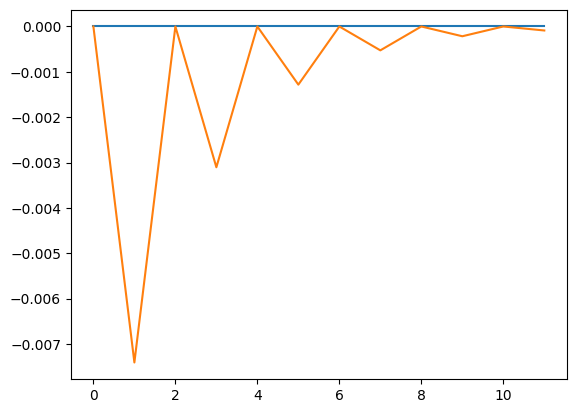

In [89]:
plt.plot(bat2_1.errors[1:])

In [90]:
bat=bat2_1
fig2_1 = go.Figure()
n=1 #H3PO4
fig2_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2_1.update_layout(title='', width=1200, height=600,)
fig2_1.show()

In [91]:
bat2_2=LLC.Battery(stages_num=3, Oin=90, Ain=20, yin=[0, 0.1/71*98], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_2)

In [92]:
LLC.BatteryTable(bat2_2)

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",90.000000,90.927606,91.799779
"y1 in, %",0.000000,0.000000,0.000000
"y2 in, %",0.138028,1.156779,2.095870
"Aq in, ton/hr",17.926518,18.796948,20.000000
"x1 in, %",0.000000,0.000000,0.000000
"x2 in, %",43.871019,46.470183,49.690141
"Org out, ton/hr",90.927606,91.798846,93.002831
"y1 out, %",0.000000,0.000000,0.000000
"y2 out, %",1.156779,2.094876,3.362324
"Aq out, ton/hr",16.998911,17.925708,18.796948


In [93]:
bat=bat2_2
fig2_2 = go.Figure()
n=1 #H3PO4
fig2_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2_2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2_2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2_2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2_2.update_layout(title='', width=1200, height=600,)
fig2_2.show()

## YPH3 with SO4

In [94]:
bat4=LLC.Battery(5, 90, 19, [0.5, 0.1/71*98, 0.06], [0, 48/71*98, .1], EQUIL=EQUIL_yph_3, eff=0.9)

In [95]:
LLC.BatteryTable(bat4)

,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5
"Org in, ton/hr",90.000000,90.288905,91.215980,92.331371,94.012060
"y1 in, %",0.500000,0.000000,0.000000,0.000000,0.000000
"y2 in, %",0.138028,0.954826,1.959247,3.140060,4.866437
"y3 in, %",0.060000,0.060948,0.062553,0.065347,0.069401
"Aq in, ton/hr",12.077921,13.004993,14.120384,15.801069,19.000000
"x1 in, %",0.000000,0.000000,0.000000,0.000000,0.000000
"x2 in, %",47.056450,50.814973,54.676966,59.466691,66.253521
"x3 in, %",0.013657,0.028285,0.049259,0.075092,0.100000
"Org out, ton/hr",90.288905,91.215978,92.331371,94.012058,97.210990
"y1 out, %",0.000000,0.000000,0.000000,0.000000,0.000000


In [96]:
bat=bat4
fig4_1 = go.Figure()
n=1 #H3PO4
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

In [97]:
bat=bat4
fig4_2 = go.Figure()
n=2 #SO4
fig4_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig4_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig4_2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig4_2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig4_2.update_layout(title='', width=1200, height=600,)
fig4_2.show()

## Process 1

In [98]:
from scipy import optimize

In [99]:
Ain=10.
xin=[0,36./71*98] #[P2O5,]
def process1(x):
    bat2_Oin= x[0]
    bat1_Ain = x[1]
    bat2_yin=[0,x[2],]
    bat1_xin=[0,x[3],]
    bat1=LLC.Battery(stages_num=5, Oin=90, Ain=bat1_Ain, yin=[0,0.1/71*98], xin=bat1_xin, EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
    bat2=LLC.Battery(stages_num=5, Oin=bat2_Oin, Ain=20, yin=bat2_yin, xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
    e1 = bat1.Ain-bat2.Aout-Ain
    e2 = bat2.Oin-bat1.Oout
    e3 = bat1.xin[1]- (bat2.xout[1] * bat2.Aout + xin[1] * Ain) / (bat2.Aout + Ain)
    e4 = bat2.yin[1]-bat1.yout[1]
    return [e1, e2, e3, e4,]

In [100]:
sol1 = optimize.root(process1, [90, 20, .1/71*98, 36/71*98])
sol1.x

array([93.54162158, 28.56597529,  3.91894711, 47.16456347])

In [101]:
bat3=LLC.Battery(stages_num=5, Oin=90, Ain=sol1.x[1], yin=[0, 0.1/71*98], xin=[0, sol1.x[3]], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
bat4=LLC.Battery(stages_num=5, Oin=sol1.x[0], Ain=20, yin=[0, sol1.x[2]], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)

In [102]:
bat=bat3
fig3_1 = go.Figure()
n=1 #H3PO4
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig3_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig3_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig3_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig3_1.update_layout(title='', width=1200, height=600,)
# fig3_1.show()

bat=bat4
# fig4_1 = go.Figure()
n=1 #H3PO4
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig3_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig3_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig3_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig3_1.update_layout(title='', width=1200, height=600,)
fig3_1.show()

## Proc 2

In [103]:
Ain=10.
xin=[0, 36/71*98,] #[P2O5,]
def process2(x):
    bat1_Oin = x[0]
    bat1_Ain = x[1]
    bat2_Oin = x[2]
    bat2_Ain = x[3]
    bat3_Oin = x[4]
    bat1_xin = [0, x[5]]
    bat2_yin = [0, x[6]]
    bat2_xin = [0, x[7]]
    bat3_yin = [0, x[8]]
    bat1=LLC.Battery(stages_num=3, Oin=bat1_Oin, Ain=bat1_Ain, yin=[0, 0.1/71*98], xin=bat1_xin, EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.9],[.8],[1]])
    bat2=LLC.Battery(stages_num=3, Oin=bat2_Oin, Ain=bat2_Ain, yin=bat2_yin, xin=bat2_xin, EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
    bat3=LLC.Battery(stages_num=3, Oin=bat3_Oin, Ain=20, yin=bat3_yin, xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.7],[.5],[.9]])
    e1 = bat2.Oin-bat1.Oout
    e2 = bat2.yin[1]-bat1.yout[1]
    e3 = bat1.Ain-bat2.Aout
    e4 = bat1.xin[1]-bat2.xout[1]
    e5 = bat3.Oin-bat2.Oout
    e6 = bat3.yin[1]-bat2.yout[1]
    e7 = bat2.Ain-bat3.Aout-Ain
    e8 = bat2.xin[1]- (bat3.xout[1] * bat3.Aout + xin[1] * Ain) / (bat3.Aout + Ain)
    e9 = bat1.xout[1] - 33/71*98
    return [e1, e2, e3, e4, e5, e6, e7, e8, e9]

In [104]:
sol2 = optimize.root(process2, [90, 20, 90, 20, 90, 36/71*98, .1/71*98, 36/71*98, .1/71*98]) #unknowns:[bat1_Oin, bat1_Ain, bat2_Oin, bat2_Ain, bat3_Oin, bat1_xin, bat2_yin, bat2_xin, bat3_yin]
sol2.x

array([31.64043794, 29.66600507, 33.5770196 , 29.92963246, 33.82777574,
       49.12372694,  5.89764787, 49.57185736,  6.59520737])

In [105]:
bat2_1=LLC.Battery(stages_num=3, Oin=sol2.x[0], Ain=sol2.x[1], yin=[0, 0.1/71*98], xin=[0, sol2.x[5]], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.9],[.8],[1]])
bat2_2=LLC.Battery(stages_num=3, Oin=sol2.x[2], Ain=sol2.x[3], yin=[0, sol2.x[6]], xin=[0, sol2.x[7]], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
bat2_3=LLC.Battery(stages_num=3, Oin=sol2.x[4], Ain=20, yin=[0, sol2.x[8]], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.7],[.5],[.9]])

In [106]:
bat=bat2_1
fig2 = go.Figure()
n=1 #H3PO4
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2.update_layout(title='', width=1200, height=600,)

bat=bat2_2
# fig2 = go.Figure()
n=1 #H3PO4
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2.update_layout(title='', width=1200, height=600,)

bat=bat2_3
# fig2 = go.Figure()
n=1 #H3PO4
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2.update_layout(title='', width=1200, height=600,)

fig2.show()

## Purification 1 -- mixer-settler fixed stages

In [107]:
index_names=['Org in, ton/hr', 'water in, %', 'P2O5 in, %', 'Fe in, ppm',
             'Aq in, ton/hr', 'solvent in, %', 'P2O5 in, %', 'Fe in, ppm',
             'Org out, ton/hr', 'water out, %', 'P2O5 out, %', 'Fe out, ppm',
             'Aq out, ton/hr', 'solvent out, %', 'P2O5 out, %', 'Fe out, ppm']

### 28th

In [108]:
EQUIL_YPH_pur_28th([[0,41.4,50e-4]]).yout

array([[0.0, 0.9665328796086189, 6.741346863335872e-05]], dtype=object)

In [109]:
test=LLC.Stage(157.1,5,[0,6.5/71*98,6e-4],[0,0,0],EQUIL=EQUIL_YPH_pur_28th, convergence=1e-5)
test.output()

Oout= 150.97053597356663
yout= [0.0 5.276604274731812 7.107436405873906e-05]
yout_tag= [0.0 5.276604274731812 7.107436405873902e-05]  %water_org_equilib, %solubles_equilib
Aout= 11.12946402643336
xout= [0.0 55.066701444276354 0.007505290885358103]
equilibrium efficiency= [1. 1. 1.]
error= [0.0 -4.6166800012050124e-10 2.3050041744549052e-08]
convergence= [0.0 9.22058987128432e-09 2.9274281827335586e-06]


In [110]:
bat2_1=LLC.Battery(stages_num=3, Oin=157.1, Ain=5, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=0.655, EQUIL=EQUIL_YPH_pur_28th, entrainment_perc_out=[0.05,0])
bat2_1.runs

13

In [111]:
# table2_1=LLC.BatteryTableFull(bat2_1).data

In [112]:
table=LLC.BatteryTable(bat2_1, show=False, index_names=index_names).data
table.iloc[[3,7,11,15]]=table.iloc[[3,7,11,15]]*1e4 # % --> ppm
table.iloc[[2,6,10,14]]=table.iloc[[2,6,10,14]]/98*71 # %H3PO4 --> %P2O5
table2_1=table
table2_1

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",157.100000,156.532453,154.664531
"water in, %",0.000000,0.000000,0.000000
"P2O5 in, %",6.500000,6.261138,5.461875
"Fe in, ppm",6.000000,2.532082,1.137059
"Aq in, ton/hr",11.803521,9.940171,5.000000
"solvent in, %",0.000000,0.000000,0.000000
"P2O5 in, %",41.794385,36.041426,0.000000
"Fe in, ppm",27.694516,10.365347,0.000000
"Org out, ton/hr",156.532707,154.668816,149.726540
"water out, %",0.000000,0.000000,0.000000


In [141]:
bat=bat2_1
fig4_1 = go.Figure()
factor,units = 1,'%' # %

n=1 #H3PO4
# n, factor, units = 2, 1e4, 'ppm' # Fe, % --> ppm

fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_tag_list[:,n]*factor, name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_list[:,n]*factor, name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])), y=np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])),np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, "+units)#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, "+units)#, range=[0.5, 2])
fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

### 7th

In [114]:
bat2_2=LLC.Battery(stages_num=3, Oin=157.1, Ain=5, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=0.73, EQUIL=EQUIL_YPH_pur_7th, entrainment_perc_out=[0.05,0])
bat2_2.runs

13

In [115]:
table=LLC.BatteryTable(bat2_2, show=False, index_names=index_names).data
table.iloc[[3,7,11,15]]=table.iloc[[3,7,11,15]]*1e4 # % --> ppm
table.iloc[[2,6,10,14]]=table.iloc[[2,6,10,14]]/98*71 # %H3PO4 --> %P2O5
table2_2=table
table2_2

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",157.100000,156.608997,154.845424
"water in, %",0.000000,0.000000,0.000000
"P2O5 in, %",6.500000,6.293482,5.540126
"Fe in, ppm",6.000000,2.627479,1.189991
"Aq in, ton/hr",11.922657,10.163976,5.000000
"solvent in, %",0.000000,0.000000,0.000000
"P2O5 in, %",42.096084,36.839124,0.000000
"Fe in, ppm",28.582234,10.848829,0.000000
"Org out, ton/hr",156.609190,154.849983,149.683803
"water out, %",0.000000,0.000000,0.000000


In [116]:
bat=bat2_2
fig4_1 = go.Figure()
factor,units = 1,'%' # %

# n=1 #H3PO4
n, factor, units = 2, 1e4, 'ppm' # Fe, % --> ppm

fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_tag_list[:,n]*factor, name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_list[:,n]*factor, name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])), y=np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])),np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, "+units)#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, "+units)#, range=[0.5, 2])
fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

## Purification 2 -- column eff 100%

### 28th

In [117]:
stage3_1=LLC.Stage(Oin=157.1, Ain=2, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_28th, entrainment_perc=[0,0,0.05,0])
# stage3_1.yout[2]
stage3_1.output()

Oout= 154.31424958733024
yout= [0.0 7.328302657073437 7.614450892703517e-05]
yout_tag= [0.0 7.328302657073437 7.614450892703518e-05]  %water_org_equilib, %solubles_equilib
Aout= 4.708593287876079
xout= [0.0 58.19205081312728 0.017219885461148884]
equilibrium efficiency= [1. 1. 1.]
error= [0.0 0.00010654833984280481 0.00848144072123982]
convergence= [0.0 0.0007258924213850581 -0.00028053913433600234]


ברזל בקלה טיהור כתלות במים עבור שלב 1

In [118]:
a=[]
b=[2,2.5,3,5,7,10,13]
for A in b:
  stage=LLC.Stage(Oin=157.1, Ain=A, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_28th, entrainment_perc=[0,0,0.05,0])
  a.append(stage.yout[2])
a
# plt.plot(b,a)

[7.614450892703517e-05,
 7.518979265374226e-05,
 7.428042132184972e-05,
 7.107436716071792e-05,
 6.842435212372285e-05,
 6.004088802500707e-05,
 5.0869662465677086e-05]

ברזל בקלה טיהור כתלות במים עבור 2 שלבים

In [119]:
a=[]
b=[2,2.5,3,5,7]
for A in b:
  bat=LLC.Battery(stages_num=2, Oin=157.1, Ain=A, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_28th, entrainment_perc_out=[0.05,0])
  a.append(bat.yout[2])
a
# plt.plot(b,a)

[2.7963671112843158e-05,
 2.3595973673965226e-05,
 2.0453655753514588e-05,
 1.352550918766703e-05,
 1.032111966731875e-05]

### 7th

ברזל בקלה טיהור כתלות במים עבור שלב 1

In [120]:
a=[]
b=[5,10,15,20,25]
for A in b:
  stage=LLC.Stage(Oin=157.1, Ain=A, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_7th, entrainment_perc=[0,0,0.05,0])
  a.append(stage.yout[2])
a
# plt.plot(b,a)

[0.00013512572025933036,
 9.328612602956085e-05,
 7.161196078280126e-05,
 5.970276324302425e-05,
 5.184720200276905e-05]

ברזל בקלה טיהור כתלות במים עבור 2 שלבים

In [121]:
a=[]
b=[3.5, 5,10,15,20,25]
for A in b:
  bat=LLC.Battery(stages_num=2, Oin=157.1, Ain=A, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_7th, entrainment_perc_out=[0.05,0])
  a.append(bat.yout[2])
a
# plt.plot(b,a)

[4.999269760740922e-05,
 3.590825276742133e-05,
 1.6281468568333157e-05,
 1.1540827786125847e-05,
 8.640412344753596e-06,
 6.424831382190032e-06]

### חופשי

In [122]:
stage3_1=LLC.Stage(Oin=157.1, Ain=4.5, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_7th, entrainment_perc=[0,0,0.05,0])
# stage3_1.yout[2]
stage3_1.output()

Oout= 151.464262376666
yout= [0.0 5.585304411728006 0.00013937555388409686]
yout_tag= [0.0 5.585304411728006 0.00013937555388409686]  %water_org_equilib, %solubles_equilib
Aout= 10.060005492145645
xout= [0.0 55.5954222190027 0.007217004408831649]
equilibrium efficiency= [1. 1. 1.]
error= [0.0 2.641395496970687e-08 -3.7204171621771067e-06]
convergence= [0.0 1.587451852084015e-05 -0.0009752358574377176]


In [123]:
bat3_1=LLC.Battery(stages_num=3, Oin=157.1, Ain=4*1.4, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_7th, entrainment_perc_out=[0.05,0], convergence=1e-5)
bat3_1.yout[2]

8.361609309592036e-06

In [124]:
table=LLC.BatteryTable(bat3_1, show=False, index_names=index_names).data
table.iloc[[3,7,11,15]]=table.iloc[[3,7,11,15]]*1e4 # % --> ppm
table.iloc[[2,6,10,14]]=table.iloc[[2,6,10,14]]/98*71 # %H3PO4 --> %P2O5
table3_1=table
table3_1

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",157.100000,156.661063,154.857019
"water in, %",0.000000,0.000000,0.000000
"P2O5 in, %",6.500000,6.315560,5.545197
"Fe in, ppm",6.000000,1.355948,0.349132
"Aq in, ton/hr",13.523248,11.718526,5.600000
"solvent in, %",0.000000,0.000000,0.000000
"P2O5 in, %",42.468729,37.848607,0.000000
"Fe in, ppm",15.156409,3.629470,0.000000
"Org out, ton/hr",156.661064,154.857198,148.741550
"water out, %",0.000000,0.000000,0.000000


In [125]:
bat=bat3_1
fig4_1 = go.Figure()
factor,units = 1,'%' # %

# n=1 #H3PO4
n, factor, units = 2, 1e4, 'ppm' # Fe, % --> ppm

fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_tag_list[:,n]*factor, name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_list[:,n]*factor, name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])), y=np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])),np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, "+units)#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, "+units)#, range=[0.5, 2])
fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

## Purification 3 -- column eff 100%

תוספת של נתוני ש"מ עבור ריכוזים נמוכים

In [126]:
EQUIL_YPH_pur_data_101223([[0,42.45/71*98,91.8e-4]]).yout

array([[0.0, 6.9412244259153155, 0.00015399779390208717]], dtype=object)

In [127]:
test=LLC.Stage(157.1,5,[0,6.5/71*98,6e-4],[0,0,0],EQUIL=EQUIL_YPH_pur_data_101223, convergence=1e-5)
test.output()

Oout= 150.76633109925203
yout= [0.0 5.148247301727127 0.0001304073018614251]
yout_tag= [0.0 5.148247301727127 0.00013040730186142507]  %water_org_equilib, %solubles_equilib
Aout= 11.333668900747945
xout= [0.0 55.87707711015245 0.006582066885670702]
equilibrium efficiency= [1. 1. 1.]
error= [0.0 -6.360987241739458e-10 1.4158034853852038e-07]
convergence= [0.0 2.2699024656775684e-08 4.015682854245116e-06]


ברזל בקלה טיהור כתלות במים עבור שלב 1

In [128]:
a=[]
b=[2,2.5,3,5,7]
for A in b:
  stage=LLC.Stage(Oin=157.1, Ain=A, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_data_101223, entrainment_perc=[0,0,0.05,0])
  a.append(stage.yout[2]*1e4)
a
# plt.plot(b,a)

[2.052279720687678,
 1.7748748948927344,
 1.6028943984165114,
 1.3040735554322478,
 1.195439466219004]

ברזל בקלה טיהור כתלות במים עבור 2 שלבים

In [129]:
a=[]
b=[2,2.5,3,5,7]
for A in b:
  bat=LLC.Battery(stages_num=2, Oin=157.1, Ain=A, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_data_101223, entrainment_perc_out=[0.05,0])
  a.append(bat.yout[2]*1e4)
a
# plt.plot(b,a)

[1.179909278602768,
 1.0410078260196693,
 0.9771566295778573,
 0.8597797464190308,
 0.8019136146745421]

### חופשי

In [130]:
stage4_1=LLC.Stage(Oin=157.1, Ain=5, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=1, EQUIL=EQUIL_YPH_pur_data_101223, entrainment_perc=[0,0,0.05,0])
# stage4_1.yout[2]
stage4_1.output()

Oout= 150.7663309222763
yout= [0.0 5.1482476519068365 0.00013040735554322477]
yout_tag= [0.0 5.1482476519068365 0.00013040735554322477]  %water_org_equilib, %solubles_equilib
Aout= 11.25828591226256
xout= [0.0 55.87707779216415 0.006582073752622975]
equilibrium efficiency= [1. 1. 1.]
error= [0.0 -9.018048417645795e-08 -4.284365998199883e-06]
convergence= [0.0 -1.1063251119423716e-05 0.000821302576030687]


In [131]:
bat4_1=LLC.Battery(stages_num=3, Oin=157.1, Ain=5, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0], eff=.95, EQUIL=EQUIL_YPH_pur_data_101223, entrainment_perc_out=[0.05,0], convergence=1e-5)
bat4_1.yout[2]*1e4

0.7450799584482362

In [132]:
table=LLC.BatteryTable(bat4_1, show=False, index_names=index_names).data
table.iloc[[3,7,11,15]]=table.iloc[[3,7,11,15]]*1e4 # % --> ppm
table.iloc[[2,6,10,14]]=table.iloc[[2,6,10,14]]/98*71 # %H3PO4 --> %P2O5
table4_1=table
table4_1

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",157.100000,156.836908,155.248448
"water in, %",0.000000,0.000000,0.000000
"P2O5 in, %",6.500000,6.389695,5.713839
"Fe in, ppm",6.000000,1.542379,0.947168
"Aq in, ton/hr",12.350243,10.761657,5.000000
"solvent in, %",0.000000,0.000000,0.000000
"P2O5 in, %",43.138559,38.810261,0.000000
"Fe in, ppm",10.968728,3.369818,0.000000
"Org out, ton/hr",156.836913,155.249013,149.489661
"water out, %",0.000000,0.000000,0.000000


In [133]:
bat=bat4_1
fig4_1 = go.Figure()
factor,units = 1,'%' # %

# n=1 #H3PO4
n, factor, units = 2, 1e4, 'ppm' # Fe, % --> ppm

fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_tag_list[:,n]*factor, name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_list[:,n]*factor, name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])), y=np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])),np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, "+units)#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, "+units)#, range=[0.5, 2])
# fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

## Purification 4 -- column eff 100%

תוספת של נתוני ש"מ עבור ריכוזים נמוכים

שימוש במקדם חלוקה: איבר חופשי 0, איבר שני -- ערך התכנסות/1

In [134]:
x_lin=np.linspace(3,111,37)
y_lin=x_lin/(-1.48E-02*x_lin**2+2*x_lin)

In [135]:
epo_3_1=[[3.5,0]]*3
epo_3_1

[[3.5, 0], [3.5, 0], [3.5, 0]]

In [136]:
epo_3_2=([[5,0]]*1+[[.5,0]])*3
epo_3_2

[[5, 0], [0.5, 0], [5, 0], [0.5, 0], [5, 0], [0.5, 0]]

In [144]:
bat4_1=LLC.Battery(stages_num=3, Oin=157.1, Ain=5, yin=[0, 6.5/71*98, 6e-4], xin=[0, 0, 0],
eff=.95, EQUIL=EQUIL_YPH_pur_data_181223, entrainment_perc_out=.5, convergence=1e-5)
bat4_1.yout[2]*1e4/bat4_1.yout[1]*85

9.914709816844333

In [145]:
# @title
bat=bat4_1
fig4_1 = go.Figure()
factor,units = 1,'%' # %

# n=1 #H3PO4
n, factor, units = 2, 1e4, 'ppm' # Fe, % --> ppm

fig4_1.add_trace(go.Scatter(x=x_lin, y=y_lin, name='equil', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_tag_list[:,n]*factor, name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_list[:,n]*factor, name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])), y=np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])),np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, "+units)#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, "+units)#, range=[0.5, 2])
# fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

In [139]:
# @title
bat=bat4_1
fig4_1 = go.Figure()
factor,units = 1,'%' # %

# n=1 #H3PO4
n, factor, units = 2, 1e4, 'ppm' # Fe, % --> ppm

fig4_1.add_trace(go.Scatter(x=x_lin, y=y_lin, name='equil', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_tag_list[:,n]*factor, name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n]*factor, y=bat.yout_list[:,n]*factor, name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])), y=np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n]*factor, [bat.xin_list[-1,n]*factor])),np.concatenate((bat.yin_list[:,n]*factor, [bat.yout_list[-1,n]*factor])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, "+units)#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, "+units)#, range=[0.5, 2])
# fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

In [140]:
# @title
table=LLC.BatteryTable(bat4_1, show=False, index_names=index_names).data
table.iloc[[3,7,11,15]]=table.iloc[[3,7,11,15]]*1e4 # % --> ppm
table.iloc[[2,6,10,14]]=table.iloc[[2,6,10,14]]/98*71 # %H3PO4 --> %P2O5
table4_1=table
table4_1

,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5,Stage 6
"Org in, ton/hr",157.100000,157.095746,157.084945,157.005963,156.662970,154.496599
"water in, %",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"P2O5 in, %",6.500000,6.498547,6.494058,6.460893,6.316422,5.389104
"Fe in, ppm",6.000000,1.342921,0.716900,0.530027,0.510500,0.502459
"Aq in, ton/hr",19.636517,12.556353,19.542245,12.132267,16.907417,5.000000
"solvent in, %",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"P2O5 in, %",43.829947,43.803707,43.686990,42.798348,38.958023,0.000000
"Fe in, ppm",36.345077,5.245420,2.512517,0.547954,0.388269,0.000000
"Org out, ton/hr",157.095746,157.084945,157.005964,156.662969,154.496604,149.566183
"water out, %",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
